In [1]:
# Modules required for ML model
!pip install -q -U "tensorflow-text==2.8.*"
!pip install -q tf-models-official==2.4.0
!pip install random_user_agent
!pip install transformers
!pip install sentencepiece
!pip install googletrans==4.0.0-rc.1
!pip install nltk

You should consider upgrading via the 'd:\softwares\python\python.exe -m pip install --upgrade pip' command.
  ERROR: Command errored out with exit status 1:
   command: 'd:\softwares\python\python.exe' 'd:\softwares\python\lib\site-packages\pip\_vendor\pep517\in_process\_in_process.py' build_wheel 'C:\Users\shree\AppData\Local\Temp\tmpqjtk948b'
       cwd: C:\Users\shree\AppData\Local\Temp\pip-install-rndq593n\pycocotools_a18058cfa127481a9bde9e9ca34c6b1f
  Complete output (14 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-37
  creating build\lib.win-amd64-cpython-37\pycocotools
  copying pycocotools\coco.py -> build\lib.win-amd64-cpython-37\pycocotools
  copying pycocotools\cocoeval.py -> build\lib.win-amd64-cpython-37\pycocotools
  copying pycocotools\mask.py -> build\lib.win-amd64-cpython-37\pycocotools
  copying pycocotools\__init__.py -> build\lib.win-amd64-cpython-37\pycocotools
  running build_ext
  skippi

You should consider upgrading via the 'd:\softwares\python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\softwares\python\python.exe -m pip install --upgrade pip' command.


  Using cached PyYAML-6.0-cp37-cp37m-win_amd64.whl (153 kB)
  Using cached tqdm-4.64.0-py2.py3-none-any.whl (78 kB)
  Using cached packaging-21.3-py3-none-any.whl (40 kB)
  Using cached sentencepiece-0.1.96-cp37-cp37m-win_amd64.whl (1.1 MB)


You should consider upgrading via the 'd:\softwares\python\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\softwares\python\python.exe -m pip install --upgrade pip' command.


  Using cached chardet-3.0.4-py2.py3-none-any.whl (133 kB)
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17415 sha256=0ccd1c0d1bab9c2eacf8fe053459d838b0cf8a21341c8fd133b826a3e658179b
  Stored in directory: c:\users\shree\appdata\local\pip\cache\wheels\43\34\00\4fe71786ea6d12314b29037620c36d857e5d104ac2748bf82a
Successfully built googletrans
  Attempting uninstall: idna
    Found existing installation: idna 3.3
    Uninstalling idna-3.3:
      Successfully uninstalled idna-3.3

You should consider upgrading via the 'd:\softwares\python\python.exe -m pip install --upgrade pip' command.



  Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Using cached click-8.1.3-py3-none-any.whl (96 kB)


In [2]:
# Load the required submodules
from official.modeling import tf_utils
from official import nlp
from official.nlp import bert
import official.nlp.optimization
import official.nlp.bert.bert_models
import official.nlp.bert.configs
import official.nlp.bert.run_classifier
import official.nlp.bert.tokenization
import official.nlp.data.classifier_data_lib
import official.nlp.modeling.losses
import official.nlp.modeling.models
import official.nlp.modeling.networks
from transformers import BatchEncoding
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.metrics import CategoricalAccuracy
from tensorflow.keras.utils import to_categorical
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pickle
from transformers import XLNetTokenizer, TFXLNetModel,XLNetConfig,XLNetTokenizerFast
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pickle
import pkg_resources
import chardet 
from tqdm import tqdm
import random
from googletrans import Translator
import time
import ast
from random_user_agent.params import SoftwareName, OperatingSystem
import nltk
import json

ModuleNotFoundError: No module named 'official'

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [ ]:
tf.config.experimental.list_physical_devices()
!nvidia-smi
for entry_point in pkg_resources.iter_entry_points('tensorboard_plugins'):
    print(entry_point.dist)
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
def Pre_Processing(Path):
    df = pd.read_csv(Path) # Loading data
    df = df=df.dropna()   # Dropping null values
    df = df.drop_duplicates(subset=['Name'], keep='last') # Removing Duplicates
    df = df.reset_index(drop=True)
    # Converting Names to lower case and removing stop words (i,me,my...) 
    stop = stopwords.words('english')
    df['Name']=df["Name"].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop))
    # Remove any whitespaces from the objects
    df['Name']=df["Name"].apply(lambda x: x.strip())
    # Remove rows, where the label is present only ones (can't be split)
    df = df.groupby('gtts_language').filter(lambda x : len(x) > 1)
    return df

In [ ]:
Input = Pre_Processing(r"/content/drive/My Drive/Input_Data1.csv")
Input.head()

In [ ]:
data = Input[['Name', 'gtts_language','Language']]           # Making a temp copy 
data['Language_label'] = pd.Categorical(data['gtts_language']) # For categorization
data['gtts_language'] = data['Language_label'].cat.codes  # Categorizing based on language
data.head()

In [ ]:
# Creating a JSON file inorder to access the language input
Output_Reference = data.drop_duplicates(subset=['gtts_language'], keep='last')         # Get the unique values for Language
Output_Reference = Output_Reference.drop(['Name'],axis=1)                              # 
Output_Reference = Output_Reference.reset_index(drop=True)
json_info = Output_Reference.to_json(orient='index')
with open("/content/drive/My Drive/Language_Code.json", "w") as outfile:
    outfile.write(json_info)
Output_Reference['Language_label'].unique

In [ ]:
# Since we have already categorized the language we will not require Language_label
data=data.drop(['Language_label','Language'], axis = 1)
# Split the data for train and test
data, data_test = train_test_split(data, test_size = 0.3, stratify = data[['gtts_language']])
final_data=data
final_data.head()

In [52]:
def create_model():
    # Name of the xlnet model to use
    model_name = 'xlnet-large-cased'
    # Max length of tokens
    max_length = 10
    # Load transformers config and set output_hidden_states to False
    config = XLNetConfig.from_pretrained(model_name)
    config.output_hidden_states = False
    # Load xlnet tokenizer
    tokenizer = XLNetTokenizerFast.from_pretrained(pretrained_model_name_or_path = model_name, config = config)
    # Load the Transformers xlnet model
    transformer_model = TFXLNetModel.from_pretrained(model_name, config = config)
    # Load the MainLayer
    xlnet = transformer_model.layers[0]
    # Build your model input
    input_ids = Input(shape=(max_length,), name='input_ids', dtype='int32')
    inputs = {'input_ids': input_ids}
    # Load the Transformers xlnet model as a layer in a Keras model
    xlnet_model = tf.reduce_mean(xlnet(inputs)[0], axis=1)
    dropout = Dropout(0.1, name='pooled_output')
    pooled_output = dropout(xlnet_model, training=False)
    # Then build your model output
    Lang = Dense(units=len(data.Language_label.value_counts()), kernel_initializer=TruncatedNormal(stddev=config.initializer_range), name='issue')(pooled_output)
    outputs = {'gtts_language': Lang}
    # And combine it all in a model object
    model = Model(inputs=inputs, outputs=outputs, name='xlnet_model_MultiLabel_MultiClass')
    # creates an optimizer with learning rate schedule
    # Set an optimizer
    optimizer = Adam(
        learning_rate=5e-05,
        epsilon=1e-08,
        decay=0.01,
        clipnorm=1.0)
    # Set loss and metrics
    loss = {'gtts_language': CategoricalCrossentropy(from_logits = True)}
    metric = {'gtts_language': CategoricalAccuracy('accuracy')}
    # Compile the model
    model.compile(
        optimizer = optimizer,
        loss = loss, 
        metrics = metric)
    # Ready output data for the model
    y_language = to_categorical(data['gtts_language'])

    # Tokenize the input (takes some time)
    x = tokenizer(
        text=data['Name'].to_list(),
        add_special_tokens=True,
        max_length=max_length,
        truncation=True,
        padding=True, 
        return_tensors='tf',
        return_token_type_ids = False,
        return_attention_mask = False,
        verbose = True)
    # Fit the model
    history = model.fit(
        x={'input_ids': x['input_ids']},
        y={'gtts_language': y_language},
        validation_split=0.2,
        batch_size=64,
        epochs=50)
    return history,model

In [53]:
use_tpu = True
if use_tpu:
    # Create distribution strategy (TPU initialization)
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
    # Create model
    with strategy.scope():
        model = create_model()
else:
    model = create_model()

INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Deallocate tpu buffers before initializing tpu system.


INFO:tensorflow:Initializing the TPU system: grpc://10.122.171.210:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.122.171.210:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Downloading:   0%|          | 0.00/761 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.32M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Some layers from the model checkpoint at xlnet-large-cased were not used when initializing TFXLNetModel: ['lm_loss']
- This IS expected if you are initializing TFXLNetModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFXLNetModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFXLNetModel were initialized from the model checkpoint at xlnet-large-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFXLNetModel for predictions without further training.


Epoch 1/50


946/946 [==============================] - 463s 304ms/step - loss: 1.4769 - accuracy: 0.5447 - val_loss: 1.2333 - val_accuracy: 0.6297
Epoch 2/50
946/946 [==============================] - 154s 163ms/step - loss: 1.1655 - accuracy: 0.6391 - val_loss: 1.1510 - val_accuracy: 0.6483
Epoch 3/50
946/946 [==============================] - 154s 162ms/step - loss: 1.0683 - accuracy: 0.6666 - val_loss: 1.0831 - val_accuracy: 0.6601
Epoch 4/50
946/946 [==============================] - 153s 162ms/step - loss: 1.0112 - accuracy: 0.6796 - val_loss: 1.0442 - val_accuracy: 0.6700
Epoch 5/50
946/946 [==============================] - 154s 162ms/step - loss: 0.9727 - accuracy: 0.6900 - val_loss: 1.0659 - val_accuracy: 0.6613
Epoch 6/50
946/946 [==============================] - 154s 163ms/step - loss: 0.9414 - accuracy: 0.6981 - val_loss: 1.0343 - val_accuracy: 0.6798
Epoch 7/50
946/946 [==============================] - 154s 162ms/step - loss: 0.9235 - accuracy: 0.7015 - val_loss: 1.0301 - val_accura

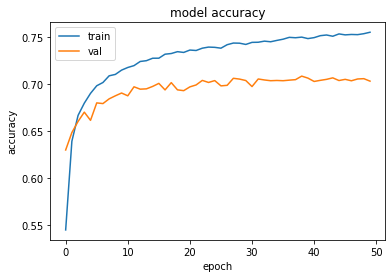

In [54]:
from matplotlib import pyplot as plt
# history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=50, batch_size=4)
plt.plot(model[0].history['accuracy'])
plt.plot(model[0].history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [59]:
test_y_language = to_categorical(data_test['gtts_language'])
test_x = tokenizer(
    text=data_test['Name'].to_list(),
    add_special_tokens=True,
    max_length=10,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)
# Run evaluation
model_eval = model[1].evaluate(
    x={'input_ids': test_x['input_ids']},
    y={'gtts_language': test_y_language}
)

1013/1013 [==============================] - 42s 30ms/step - loss: 0.9858 - accuracy: 0.6942


In [ ]:
# Saving the Model and weights as JSON and use latter for prediction
load_model=model[1]
Load_model = load_model.to_json()
with open('/content/drive/My Drive/Lego2_model.json','w') as file:
  file.write(Load_model)
load_model.save_weights('/content/drive/My Drive/Lego2_weights.h5')
with open('/content/drive/My Drive/Language_Code.json') as f:
    Language_Input = json.loads(f.read())

In [96]:
# Test Case and Validation
text= 'Saraswathi'
a = tokenizer.encode(
    text= text,
    add_special_tokens=True,
    max_length=10,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)
a_as_vector = tf.reshape(a, [-1])
#padding
zero_padding = tf.zeros([1 * 10] - tf.shape(a_as_vector), dtype=a.dtype)
a_reshape=tf.concat([a_as_vector, zero_padding],0)
a_reshape=tf.reshape(a_reshape,[1,10])
d=model[1].predict(a_reshape)
c=np.argmax(d['gtts_language'])
for key, info in Language_Input.items():
    if(info['gtts_language'] == c):
      lang=info['Language']
      print("{} is {}".format(text,lang ))

Saraswathi is Tamil


In [26]:
model_name = 'xlnet-large-cased'
# Load transformers config and set output_hidden_states to False
config = XLNetConfig.from_pretrained(model_name)
config.output_hidden_states = False
# Load xlnet tokenizer
tokenizer = XLNetTokenizer.from_pretrained(pretrained_model_name_or_path = model_name, config = config)

Downloading:   0%|          | 0.00/761 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/779k [00:00<?, ?B/s]

In [82]:
from tensorflow.keras.models import model_from_json
json_file = open('/content/drive/My Drive/Lego2_model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights("/content/drive/My Drive/Lego2_weights.h5")
with open('/content/drive/My Drive/Language_Code.json') as f:
    Language_Input = json.loads(f.read())
 

In [95]:
#@title Name Language prediction
Full_Name= "Brian Sawyer" #@param {type:"string"}
Name = Full_Name.lower()
Name = Name.strip()
a = tokenizer.encode(
    text= Name,
    add_special_tokens=True,
    max_length=10,
    truncation=True,
    padding=True, 
    return_tensors='tf',
    return_token_type_ids = False,
    return_attention_mask = False,
    verbose = True)
a_as_vector = tf.reshape(a, [-1])
zero_padding = tf.zeros([1 * 10] - tf.shape(a_as_vector), dtype=a.dtype)
a_reshape=tf.concat([a_as_vector, zero_padding],0)
a_reshape=tf.reshape(a_reshape,[1,10])
d=loaded_model.predict(a_reshape)
c=np.argmax(d['gtts_language'])
for key, info in Language_Input.items():
    if(info['gtts_language'] == c):
      lang=info['Language']
      print("{} is {}".format(Full_Name,lang ))

Brian Sawyer is English
